<a href="https://colab.research.google.com/github/vladimbo/Bayesian/blob/master/FREDPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install fredapi

In [2]:
import fredapi 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred

fred = Fred(api_key='987fa600e241265c734c3dc51d515000')

dtindex = pd.date_range(start='2004-01-01', end='2020-08-13', freq='D')

               0      1     2
2004-01-01  1.42  18.22  1.31
2004-01-02  1.42  18.22  1.31
2004-01-03  1.42  18.22  1.31
2004-01-04  1.42  18.22  1.31
2004-01-05  1.42  17.49  1.31
...          ...    ...   ...
2020-08-09 -5.47  22.21  1.51
2020-08-10 -5.47  22.13  1.51
2020-08-11 -5.47  24.03  1.51
2020-08-12 -5.47  22.28  1.51
2020-08-13 -5.47  22.28  1.51

[6070 rows x 3 columns]


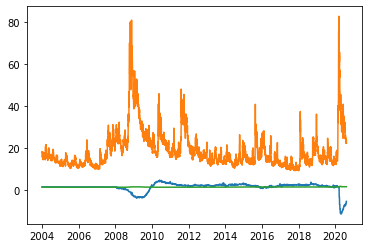

In [3]:
FDBS = pd.DataFrame(index=dtindex)
ftickers=['WEI', 'VIXCLS', 'ISRATIO']
#for fticker in ftickers:
X1 = fred.get_series('WEI', observation_start='2004-01-01', observation_end='2020-08-13')
X2 = fred.get_series('VIXCLS', observation_start='2004-01-01', observation_end='2020-08-13')
X3 = fred.get_series('ISRATIO', observation_start='2004-01-01', observation_end='2020-08-13')

DBSF = pd.concat([FDBS, X1, X2, X3], axis=1)
DBSF.fillna(method='ffill', inplace=True)
DBSF.fillna(method='bfill', inplace=True)

print(DBSF)


plt.plot(DBSF)

['BOGMBASE', 'M2', 'M1', 'M1REAL', 'TSIFRGHT']
                    0        1       2       3      4
2004-01-01   736438.0   6053.0  1303.0   701.0  107.8
2004-01-02   736438.0   6053.0  1303.0   701.0  107.8
2004-01-03   736438.0   6053.0  1303.0   701.0  107.8
2004-01-04   736438.0   6053.0  1303.0   701.0  107.8
2004-01-05   736438.0   6053.0  1303.0   701.0  107.8
...               ...      ...     ...     ...    ...
2020-08-09  4700401.0  18259.6  5490.1  2025.5  128.3
2020-08-10  4700401.0  18259.6  5490.1  2025.5  128.3
2020-08-11  4700401.0  18259.6  5490.1  2025.5  128.3
2020-08-12  4700401.0  18259.6  5490.1  2025.5  128.3
2020-08-13  4700401.0  18259.6  5490.1  2025.5  128.3

[6070 rows x 5 columns]


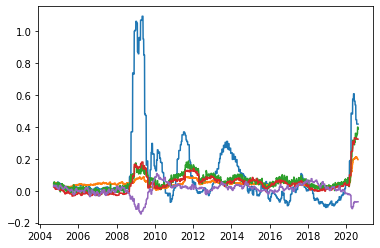

In [4]:
FDBSL = pd.DataFrame(index=dtindex)
tickers = ['BOGMBASE', 'M2', 'M1', 'M1REAL','TSIFRGHT']
print(tickers)


X1 = fred.get_series('BOGMBASE', observation_start='2004-01-01', observation_end='2020-08-13')
X2 = fred.get_series('M2', observation_start='2004-01-01', observation_end='2020-08-13')
X3 = fred.get_series('M1', observation_start='2004-01-01', observation_end='2020-08-13')
X4 = fred.get_series('M1REAL', observation_start='2004-01-01', observation_end='2020-08-13')
X5 = fred.get_series('TSIFRGHT', observation_start='2004-01-01', observation_end='2020-08-13')
DBSFL = pd.concat([FDBSL, X1, X2, X3, X4, X5], axis=1)


DBSFL.fillna(method='ffill', inplace=True)
DBSFL.fillna(method='bfill', inplace=True)

print(DBSFL)


DBSY = DBSFL.pct_change(260)
plt.plot(DBSY)

                   0         1         2  ...         2         3        4
2004-01-01  0.027612 -0.046556 -0.285640  ... -0.249502 -0.318243  0.46811
2004-01-02  0.027612 -0.046556 -0.285640  ... -0.249502 -0.318243  0.46811
2004-01-03  0.027612 -0.046556 -0.285640  ... -0.249502 -0.318243  0.46811
2004-01-04  0.027612 -0.046556 -0.285640  ... -0.249502 -0.318243  0.46811
2004-01-05  0.027612 -0.125715 -0.285640  ... -0.249502 -0.318243  0.46811
...              ...       ...       ...  ...       ...       ...      ...
2020-08-09 -3.268780  0.386111  2.664815  ...  6.018837  4.634206 -2.02591
2020-08-10 -3.268780  0.377436  2.664815  ...  6.018837  4.634206 -2.02591
2020-08-11 -3.268780  0.583468  2.664815  ...  5.803698  4.634206 -2.02591
2020-08-12 -3.268780  0.393702  2.664815  ...  5.803698  4.634206 -2.02591
2020-08-13 -3.268780  0.393702  2.664815  ...  5.803698  4.634206 -2.02591

[6070 rows x 8 columns]


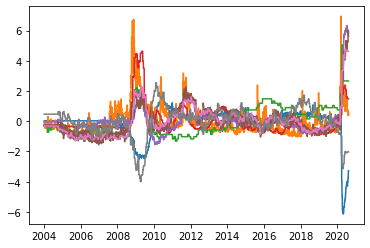

In [6]:
FDB = pd.DataFrame(index=dtindex)
DBS = pd.concat([FDB, DBSF, DBSY], axis=1)
mean = DBS.mean()
stdv = DBS.std()
DBS -= mean
DBS /= stdv
DBS.fillna(method='bfill', inplace=True)
DBS.fillna(method='ffill', inplace=True)
print(DBS)
plt.plot(DBS)



                 PC1       PC2       PC3       PC4
2004-01-01 -0.579137 -0.053214  0.100893 -0.037575
2004-01-02 -0.579137 -0.053214  0.100893 -0.037575
2004-01-03 -0.579137 -0.053214  0.100893 -0.037575
2004-01-04 -0.579137 -0.053214  0.100893 -0.037575
2004-01-05 -0.601841 -0.092591  0.066385 -0.071484
...              ...       ...       ...       ...
2020-08-09  9.676217 -4.440080 -0.553598 -0.598731
2020-08-10  9.673729 -4.444396 -0.557380 -0.602447
2020-08-11  9.617261 -4.210851 -0.511586 -0.499693
2020-08-12  9.562835 -4.305247 -0.594311 -0.580980
2020-08-13  9.562835 -4.305247 -0.594311 -0.580980

[6070 rows x 4 columns]


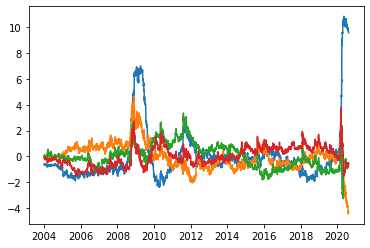

In [7]:
DBSNP = DBS.to_numpy()
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
DBSPC = pca.fit_transform(DBSNP)
DBSP = pd.DataFrame({'PC1': DBSPC[:, 0], 'PC2': DBSPC[:, 1], 'PC3': DBSPC[:,2], 'PC4': DBSPC[:,3]}, index=dtindex)
print(DBSP)
plt.plot(DBSP)